In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

# 한글 깨짐
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize']=15,8
plt.figure(figsize=(4,4)) #그래프 사이즈

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [6]:
# read excel file
df = pd.read_excel(r"D:\패캠 AI부트캠프 6기(23.07~)\02 온라인 강의\00 강의 자료\올인원 패키지_나의 커리어 치트키 데이터 분석 유치원\00 파이썬 데이터 자료\도로교통공단_일자별 시군구별 교통사고 건수.xlsx")

In [7]:
df.head()

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,1,서울,종로구,1,0,0,1,0
1,1,1,서울,중구,1,0,0,2,0
2,1,1,서울,용산구,2,0,0,5,0
3,1,1,서울,성동구,1,0,0,1,0
4,1,1,서울,동대문구,3,0,1,2,0


In [9]:
# date format 변경

a=range(0,59724)
b=range(0,59724)

df['dt']=pd.DataFrame(list(map(lambda x, y: '2020-'+str(df['발생월'][x])+'-'+str(df['발생일'][y]),a,b)))
df['ym']=pd.DataFrame(list(map(lambda x: '2020-'+str(df['발생월'][x]), a)))

df.head()

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,dt,ym
0,1,1,서울,종로구,1,0,0,1,0,2020-1-1,2020-1
1,1,1,서울,중구,1,0,0,2,0,2020-1-1,2020-1
2,1,1,서울,용산구,2,0,0,5,0,2020-1-1,2020-1
3,1,1,서울,성동구,1,0,0,1,0,2020-1-1,2020-1
4,1,1,서울,동대문구,3,0,1,2,0,2020-1-1,2020-1


In [14]:
df['dt']=df['dt'].map(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-%d'))
df['ym']=df['ym'].map(lambda x: datetime.strptime(x, '%Y-%m').strftime('%Y-%m'))

df.head()

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,dt,ym
0,1,1,서울,종로구,1,0,0,1,0,2020-01-01,2020-01
1,1,1,서울,중구,1,0,0,2,0,2020-01-01,2020-01
2,1,1,서울,용산구,2,0,0,5,0,2020-01-01,2020-01
3,1,1,서울,성동구,1,0,0,1,0,2020-01-01,2020-01
4,1,1,서울,동대문구,3,0,1,2,0,2020-01-01,2020-01


# 분산, 표준편차

In [15]:
df.describe()

,발생월,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000
mean,6.554400,15.795710,3.510381,0.051587,1.014065,3.784676,0.328076
std,3.420461,8.786796,3.008699,0.237546,1.258949,3.903219,0.766818
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,16.000000,3.000000,0.000000,1.000000,3.000000,0.000000
75%,10.000000,23.000000,5.000000,0.000000,1.000000,5.000000,0.000000
max,12.000000,31.000000,31.000000,5.000000,15.000000,46.000000,29.000000


In [17]:
# 분산

import numpy

val=df['사고건수']
var=numpy.var(val)
var

9.052115794766637

In [18]:
# 표준편차

import math 

std=math.sqrt(var)
std

3.008673427736323

In [19]:
# 표준편차

std=numpy.std(val)
std

3.008673427736323

In [20]:
pd.DataFrame(df.groupby('ym').사고건수.std()).reset_index()

,ym,사고건수
0,2020-01,2.891651
1,2020-02,3.217841
2,2020-03,2.581055
3,2020-04,2.852483
4,2020-05,2.997590
5,2020-06,3.118051
6,2020-07,3.125998
7,2020-08,2.856211
8,2020-09,3.073991
9,2020-10,3.150494


# Boxplot

In [21]:
df.describe()

,발생월,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000
mean,6.554400,15.795710,3.510381,0.051587,1.014065,3.784676,0.328076
std,3.420461,8.786796,3.008699,0.237546,1.258949,3.903219,0.766818
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,16.000000,3.000000,0.000000,1.000000,3.000000,0.000000
75%,10.000000,23.000000,5.000000,0.000000,1.000000,5.000000,0.000000
max,12.000000,31.000000,31.000000,5.000000,15.000000,46.000000,29.000000


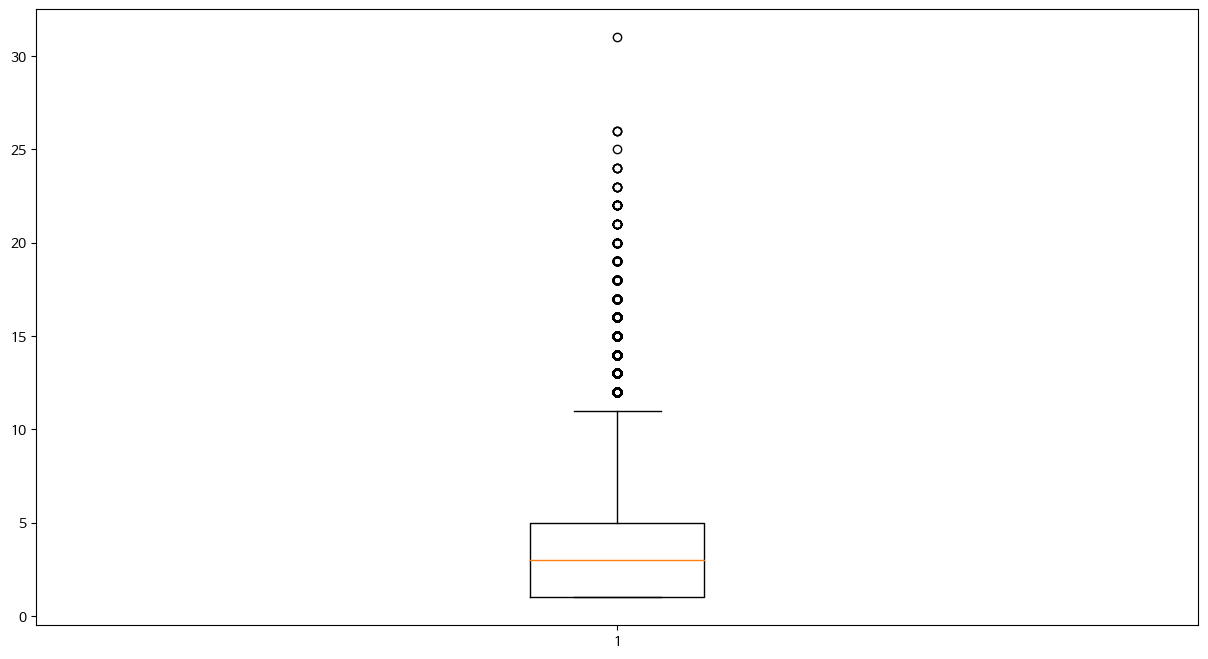

In [22]:
plt.boxplot(df['사고건수'])
plt.show()

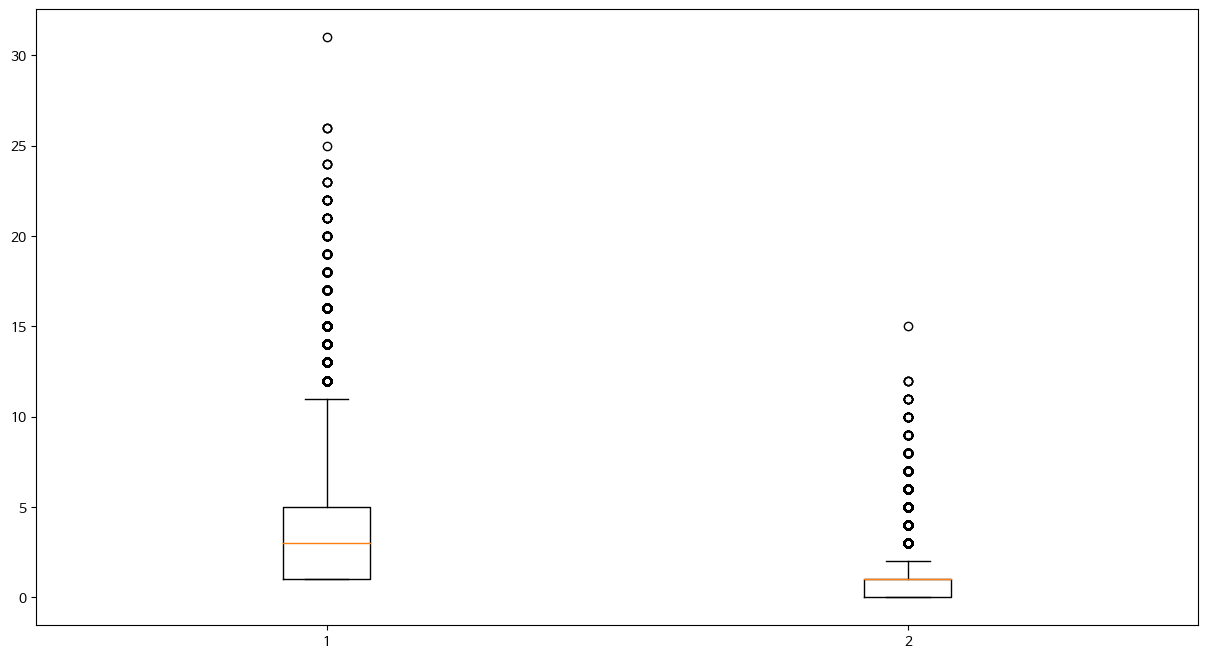

In [23]:
fig, ax=plt.subplots()
ax.boxplot([df['사고건수'],df['중상자수']])
plt.show()

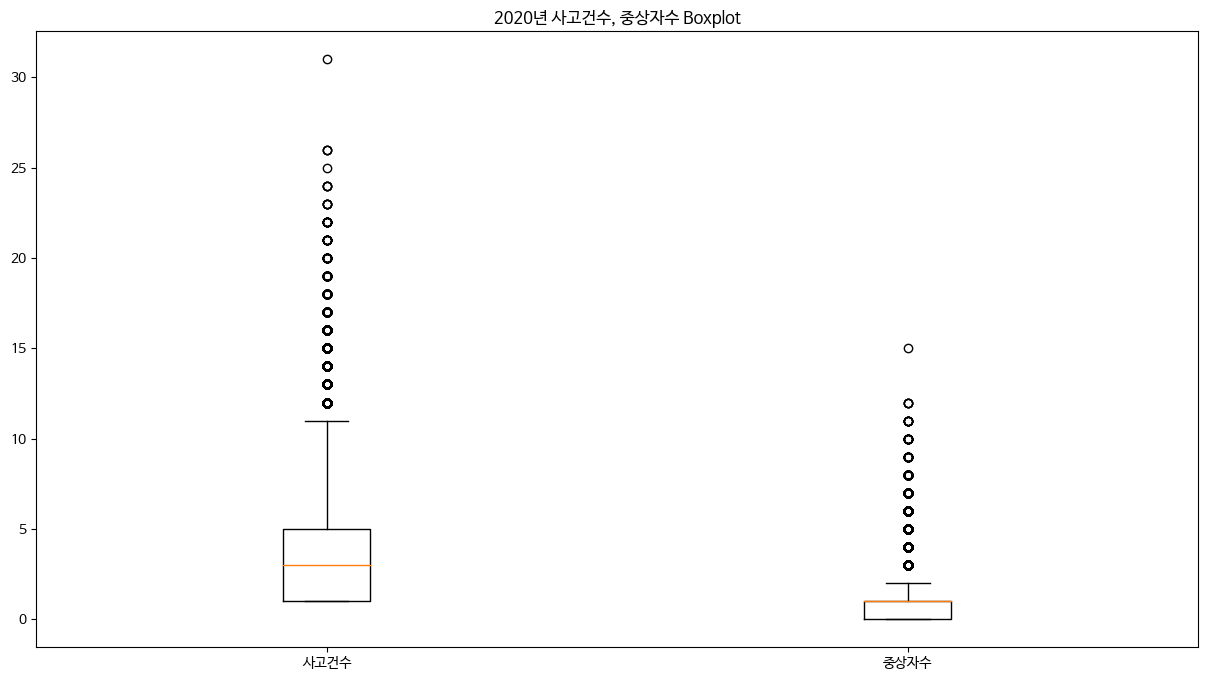

In [24]:
fig, ax=plt.subplots()
ax.boxplot([df['사고건수'],df['중상자수']])

plt.title('2020년 사고건수, 중상자수 Boxplot')
plt.xticks([1,2],['사고건수', '중상자수'])
plt.show()

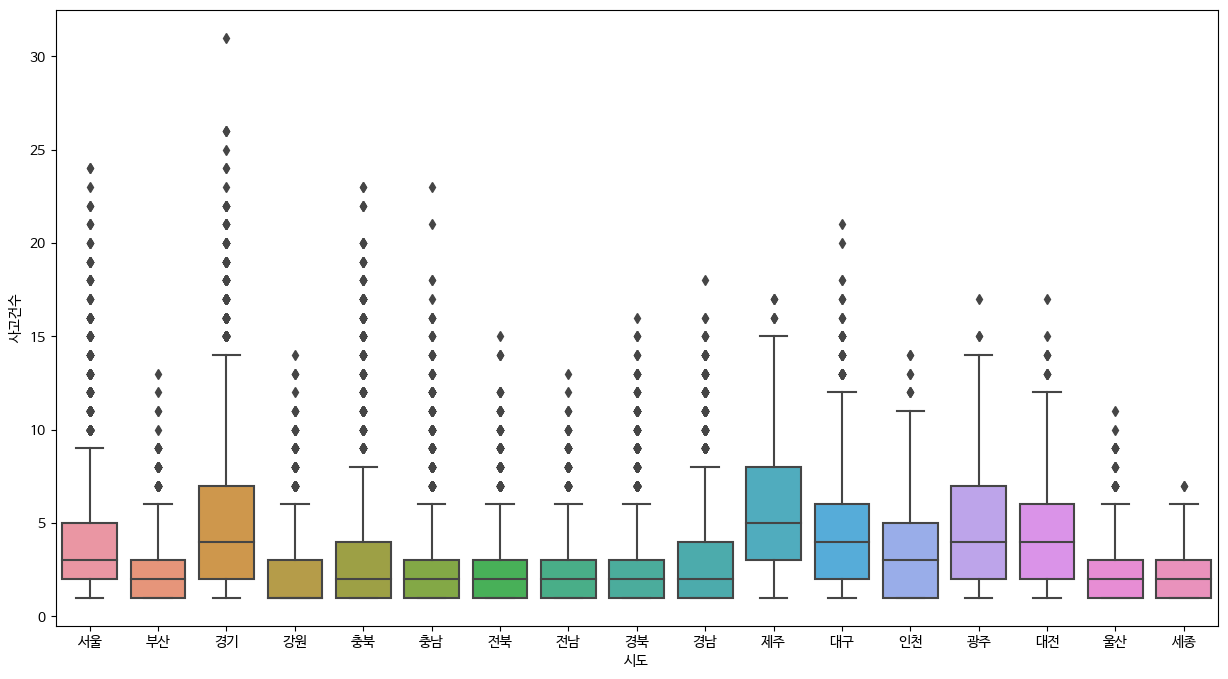

In [25]:
sns.boxplot(x='시도',y='사고건수', data=df)
plt.show()

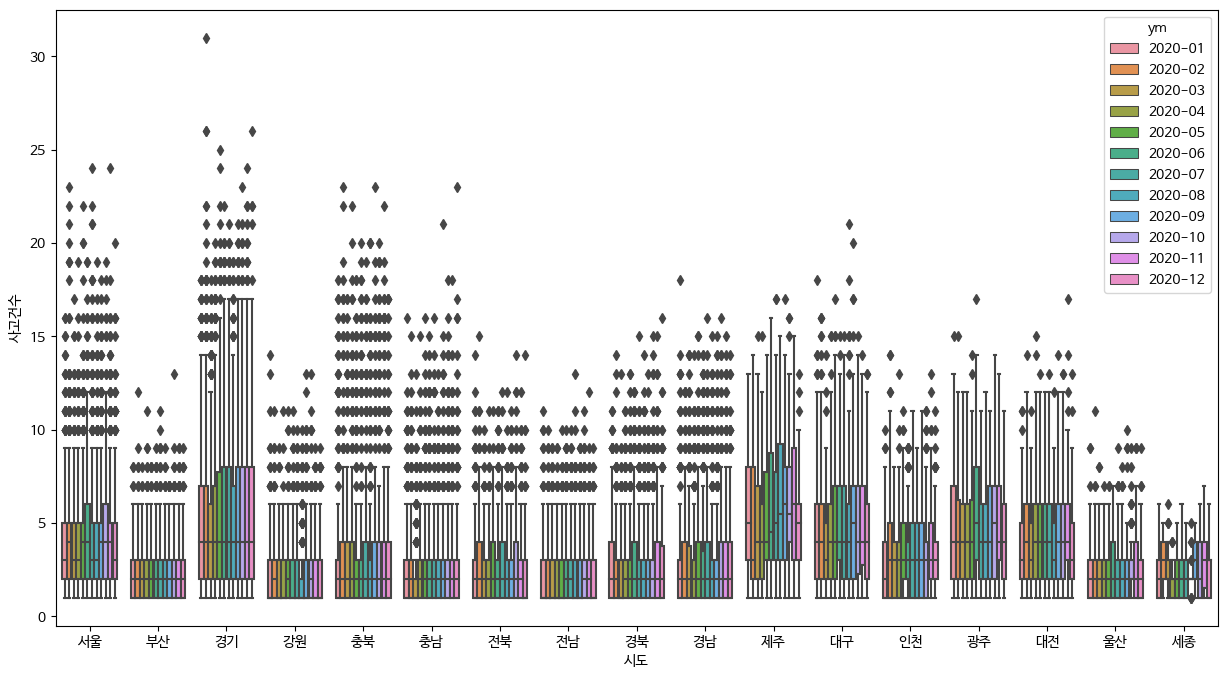

In [26]:
sns.boxplot(x='시도', y='사고건수', hue='ym', data=df)
plt.show()

In [28]:
sns.factorplot(x='시도', y='사고건수', col='ym', kind='box', palette='Set3', data=df)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

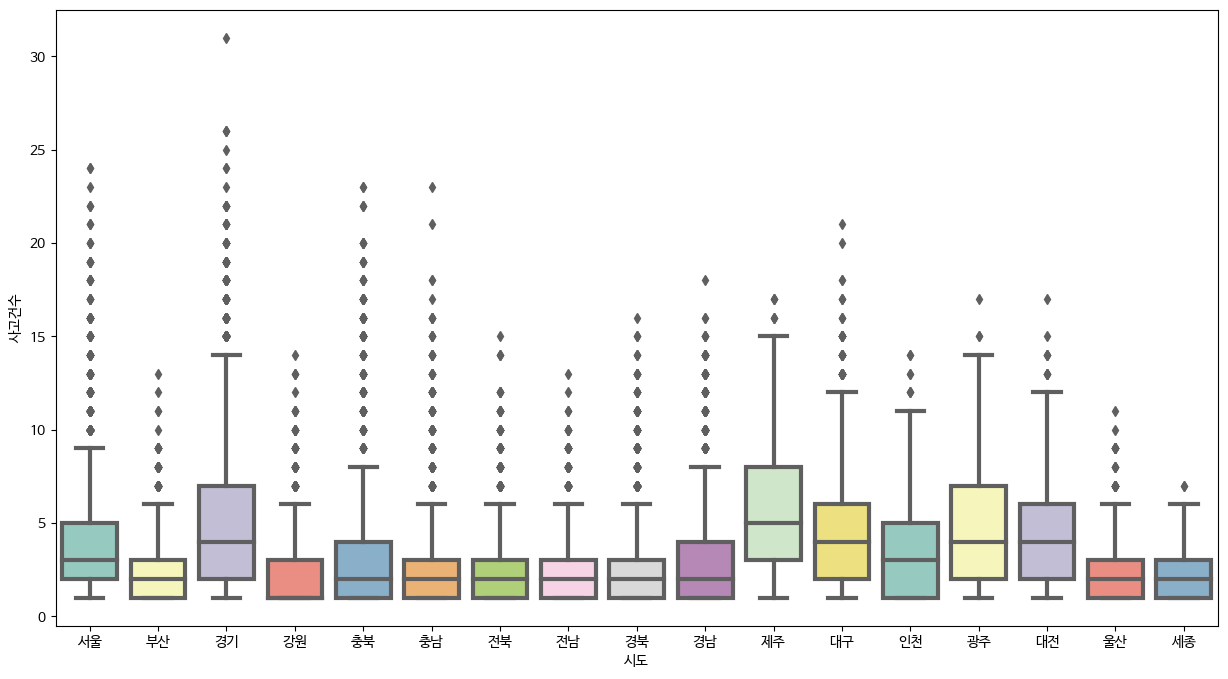

In [31]:
sns.boxplot(x='시도',y='사고건수',data=df,palette='Set3',linewidth=3,width=0.8)
plt.show()

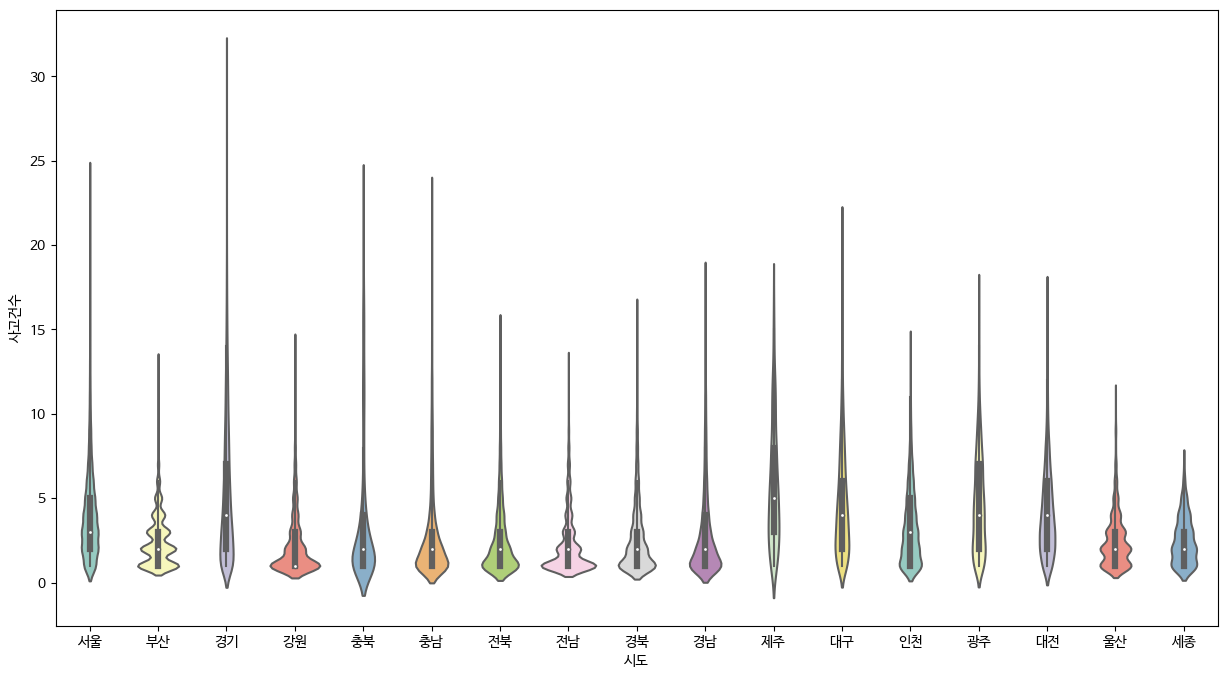

In [30]:
sns.violinplot(x='시도',y='사고건수',data=df, palette='Set3')
plt.show()